In [1]:
import pandas as pd
import numpy as np
# https://github.com/vcerqueira/blog/
# from src.tde import time_delay_embedding

In [2]:
import re

In [3]:
def time_delay_embedding(series: pd.Series,
                         n_lags: int,
                         horizon: int,
                         return_Xy: bool = False):
    """
    Time delay embedding
    Time series for supervised learning
    :param series: time series as pd.Series
    :param n_lags: number of past values to used as explanatory variables
    :param horizon: how many values to forecast
    :param return_Xy: whether to return the lags split from future observations
    :return: pd.DataFrame with reconstructed time series
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    df_list = [series.shift(i) for i in n_lags_iter]
    df = pd.concat(df_list, axis=1).dropna()
    df.columns = [f'{name}(t-{j - 1})'
                  if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                  for j in n_lags_iter]

    df.columns = [re.sub('t-0', 't', x) for x in df.columns]

    if not return_Xy:
        return df

    is_future = df.columns.str.contains('\+')

    X = df.iloc[:, ~is_future]
    Y = df.iloc[:, is_future]
    if Y.shape[1] == 1:
        Y = Y.iloc[:, 0]

    return X, Y

In [4]:
dataset = pd.read_csv('Covid_population_vaccine_fillna.csv', parse_dates=['date'])

In [5]:
dataset.drop(["reporting_year","pruid"], axis = 1, inplace = True) 

In [6]:
data_ON=dataset[dataset.prname=="Ontario"].drop(["prname"], axis = 1) 

In [7]:
# setting date as index
data_ON.set_index('date', inplace=True)

In [8]:
data_ON_2=dataset[dataset.prname=="Ontario"].drop(["prname"], axis = 1)
data_ON_2.set_index('date', inplace=True)

In [9]:
data_ON

,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,ratedeaths,ratecases_last7,ratedeaths_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,totalcases,Population,Land_Area_Square_Kilometres,numtotal_atleast1dose,numtotal_partially,numtotal_fully
date,,,,,,,,,,,,,,,,
2020-02-01,3,0.02,0,0,0.00,0.02,0.00,0.00,0.00,0.00,3,14686092.0,892411.76,0.0,0.0,0.0
2020-02-08,0,0.02,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,14686092.0,892411.76,0.0,0.0,0.0
2020-02-15,0,0.02,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,14686092.0,892411.76,0.0,0.0,0.0
2020-02-22,0,0.02,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,14686092.0,892411.76,0.0,0.0,0.0
2020-02-29,5,0.05,0,0,0.00,0.03,0.00,0.00,0.00,0.00,8,14686092.0,892411.76,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,6009,10165.95,15470,63,102.39,39.77,0.42,5.68,9.00,0.06,1536016,14940912.0,892411.76,12684588.0,465448.0,12219140.0
2022-12-24,7284,10214.16,15537,67,102.83,48.21,0.44,6.89,9.57,0.06,1543300,14940912.0,892411.76,12684588.0,465448.0,12219140.0
2022-12-31,5824,10252.71,15606,69,103.29,38.55,0.46,5.51,9.86,0.07,1549124,14940912.0,892411.76,12690840.0,465787.0,12225053.0


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) 

for i in range(0,data_ON.shape[1]):
    
    # To scale data 
    scaler.fit(data_ON[data_ON.columns[i]].values.reshape(-1,1)) 
    
    data_ON[data_ON.columns[i]]=scaler.transform(data_ON[data_ON.columns[i]].values.reshape(-1,1))

In [11]:
data_ON

,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,ratedeaths,ratecases_last7,ratedeaths_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,totalcases,Population,Land_Area_Square_Kilometres,numtotal_atleast1dose,numtotal_partially,numtotal_fully
date,,,,,,,,,,,,,,,,
2020-02-01,0.000033,0.000000,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000,0.000,0.000000,0.982945,0.0,0.000000,0.000000,0.000000
2020-02-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.982945,0.0,0.000000,0.000000,0.000000
2020-02-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.982945,0.0,0.000000,0.000000,0.000000
2020-02-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.982945,0.0,0.000000,0.000000,0.000000
2020-02-29,0.000054,0.000003,0.000000,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000,0.000003,0.982945,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,0.065439,0.982853,0.979486,0.150358,0.979527,0.065439,0.151625,0.065423,0.150351,0.150,0.982853,1.000000,0.0,0.999507,0.058699,0.999516
2022-12-24,0.079324,0.987514,0.983728,0.159905,0.983737,0.079327,0.158845,0.079360,0.159873,0.150,0.987514,1.000000,0.0,0.999507,0.058699,0.999516
2022-12-31,0.063424,0.991241,0.988097,0.164678,0.988137,0.063432,0.166065,0.063465,0.164718,0.175,0.991241,1.000000,0.0,1.000000,0.058742,1.000000


In [12]:
# you can simulate some data with the following code
# wine = pd.DataFrame(np.random.random((100, 6)),
#            columns=['Fortified','Drywhite','Sweetwhite',
#                      'Red','Rose','Sparkling'])

# create data set with lagged features using time delay embedding
data_ON_ds = []
for col in data_ON:
    col_df = time_delay_embedding(data_ON[col], n_lags=24, horizon=0)
    data_ON_ds.append(col_df)

In [13]:
data_ON_ds

[            numtotal_last7(t-23)  numtotal_last7(t-22)  numtotal_last7(t-21)  \
 date                                                                           
 2020-07-18              0.000033              0.000000              0.000000   
 2020-07-25              0.000000              0.000000              0.000000   
 2020-08-01              0.000000              0.000000              0.000054   
 2020-08-08              0.000000              0.000054              0.000218   
 2020-08-15              0.000054              0.000218              0.000555   
 ...                          ...                   ...                   ...   
 2022-12-17              0.074957              0.089724              0.117385   
 2022-12-24              0.089724              0.117385              0.133949   
 2022-12-31              0.117385              0.133949              0.123505   
 2023-01-07              0.133949              0.123505              0.113377   
 2023-01-14              0.1

In [14]:
# concatenating all variables
data_ON_df = pd.concat(data_ON_ds, axis=1).dropna()

# defining target (Y) and explanatory variables (X)
predictor_variables = data_ON_df.columns.str.contains('\(t\-')
target_variables = data_ON_df.columns.str.contains('totalcases\(t\)')

X = data_ON_df.iloc[:, predictor_variables]
Y = data_ON_df.iloc[:, target_variables]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import math


# train/test split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=24, shuffle=False)

# fitting a RF model
# model = RandomForestRegressor()
model = LinearRegression()
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_tr, Y_tr)

# getting forecasts for the test set
preds = model.predict(X_ts)

# computing MAE error
# print(math.sqrt(mse(Y_ts, preds)))

In [16]:
Y_ts.shape

(24, 1)

In [17]:
scaler.fit(data_ON_2["totalcases"].values.reshape(-1,1))
inv_y=scaler.inverse_transform(preds.reshape(-1,1))

In [18]:
inv_y[:,0]

array([1354641.95216657, 1381051.47736343, 1378483.38955808,
       1396260.49087372, 1395497.77831872, 1407867.6927874 ,
       1414218.43567712, 1421564.9712905 , 1428892.91479048,
       1439960.20007888, 1446261.40987161, 1454977.76670856,
       1473732.39408773, 1483914.33947269, 1507550.3443878 ,
       1510308.106764  , 1508864.16175206, 1501431.28456292,
       1499700.88168803, 1512275.14341829, 1521606.0527857 ,
       1547873.60600362, 1549181.03428244, 1546625.08789266])

In [19]:
data_ON_2["totalcases"][0:130].values

array([      3,       3,       3,       3,       8,      28,      79,
           377,     993,    3630,    6648,   10010,   13995,   17119,
         19944,   22313,   25040,   27533,   30202,   31992,   33301,
         34476,   35656,   36594,   37440,   38543,   39333,   39967,
         40565,   41287,   42083,   43003,   44300,   46484,   49340,
         53633,   58490,   63713,   69331,   75730,   82825,   92761,
        102378,  113038,  125385,  138504,  153614,  169411,  187998,
        211837,  234364,  252585,  266363,  276718,  284887,  291999,
        299754,  306997,  316359,  327083,  340692,  358558,  382152,
        412745,  441404,  466733,  489087,  507117,  520774,  529510,
        535419,  539153,  541880,  543917,  545590,  546983,  548040,
        549156,  550436,  552056,  555050,  558790,  563591,  568822,
        573835,  578869,  583275,  587521,  591331,  594419,  597145,
        599615,  602595,  606507,  610950,  616051,  622313,  630671,
        645766,  687

In [20]:
cb=np.hstack((data_ON_2["totalcases"][0:130].values, inv_y[:,0]))

In [21]:
import matplotlib.pyplot as plt

Text(132, 20, 'test set')

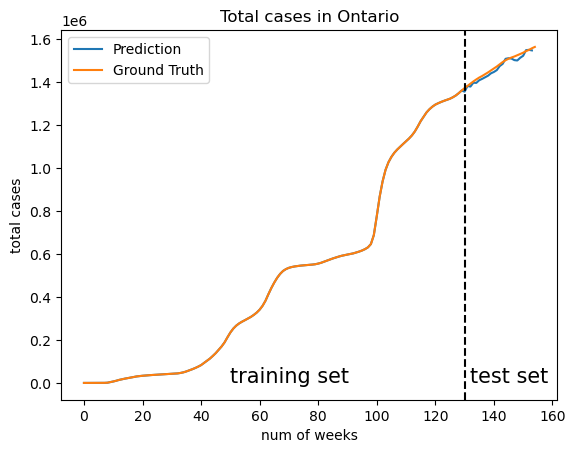

In [22]:
plt.plot(cb)
plt.plot(data_ON_2["totalcases"].values)
plt.axvline(130, color="black",ls='--')
plt.title("Total cases in Ontario")
plt.legend(["Prediction", "Ground Truth"],loc='upper left')
plt.xlabel('num of weeks')
plt.ylabel('total cases')
plt.text(50,20,'training set', fontsize=15)
plt.text(132,20,'test set', fontsize=15)

In [25]:
from sklearn.metrics import r2_score

In [30]:
print("Linear Regression")
print("MAE:",mae(data_ON_2["totalcases"][131:].values, inv_y[:,0]))
print("MSE:",mse(data_ON_2["totalcases"][131:].values, inv_y[:,0]))
print("rmse:",math.sqrt(mse(data_ON_2["totalcases"][131:].values, inv_y[:,0])))
print("r2 score:",r2_score(data_ON_2["totalcases"][131:].values, inv_y[:,0]))

Linear Regression
MAE: 18229.128475708654
MSE: 402103241.93278784
rmse: 20052.512110276555
r2 score: 0.865501285498299
